######
Content:

The main task of clustering is to identify natural groups within an unlabeled dataset. This means that clustering is an unsupervised machine learning task, which is important in many scientific, engineering, and business domains. This project demonstrates how to perform customer segmentation for a shopping mall using machine learning algorithms.

Description of features:

1- CUST_ID: Credit card holder ID

2- BALANCE: Monthly average balance (based on daily balance averages)

3- BALANCE_FREQUENCY: Ratio of last 12 months with balance. (1: Frequently updated, 0: Not frequently updated)

4- PURCHASES: Total purchase amount spent during last 12 months

5- ONEOFF_PURCHASES: Total amount of one-off purchases

6- INSTALLMENTS_PURCHASES: Total amount of installment purchases

7- CASH_ADVANCE: Total cash-advance amount

8- PURCHASES_FREQUENCY: Frequency of purchases. (1: Frequently purchased, 0: Not frequently purchased)

9- ONEOFF_PURCHASES_FREQUENCY: Frequency of one-off-purchases. (1: Frequently purchased, 0: Not frequently purchased)

10- PURCHASES_INSTALLMENTS_FREQUENCY: Frequency of installment purchases. (1: Frequently purchased, 0: Not frequently purchased)

11- CASHADVANCE_FREQUENCY: Cash-Advance frequency

12- CASH_ADVANCE_TRX: Average amount per cash-advance transaction

13- PURCHASES_TRX: Average amount per purchase transaction

14- CREDIT_LIMIT: Credit limit

15- PAYMENTS: Total payments (Due amount paid by the customer to decrease their statement balance) in the period

16- MINIMUM_PAYMENTS: Total minimum payments due in the period

17- PRC_FULL_PAYMEN: Percentage of months with full payment of the due statement balance

18- TENURE: Number of months as a customer

Objective:

The clustering goal is to present and compare five popular clustering algorithms: K-Means Clustering, Hierarchical Clustering, Gaussian Mixture Clustering, Mini-batch K-Means Clustering, and DBSCAN.

### extracted from https://www.kaggle.com/code/mbsoroush/customer-segmentation for learning purposes

In [2]:
!pip install plotly termcolor xgboost kneed yellowbrick

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 3.8 MB/s eta 0:00:0000:0100:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 MB 5.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 282.6/282.6 KB 6.6 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.9/190.9 MB 2.4 MB/s eta 0:00:0000:0100:01


In [3]:
# Data
import pandas as pd
import numpy as np
from scipy import stats

#Collections library for counting elements in a list
#from collections import Counter

#tqdm library for progress bars
#from tqdm import tqdm

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
from termcolor import colored

# Algorithms
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import DBSCAN
from itertools import product
from sklearn.neighbors import NearestNeighbors
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
import xgboost as xg

# Train Test Split
from sklearn.model_selection import train_test_split


# scipy library for hierarchical clustering
from scipy.cluster.hierarchy import ward, dendrogram, linkage
from scipy.cluster import hierarchy

# kneed library for finding the knee/elbow point in a plot
from kneed import KneeLocator, DataGenerator

#yellowbrick library for visualizing elbow and silhouette plots for clustering
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# sklearn library
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import silhouette_score, calinski_harabasz_score

# Scaling
from sklearn.preprocessing import StandardScaler

# Supress warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv('Customer_Data.csv')

In [5]:
df = pd.DataFrame(data)
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [6]:
df.describe().T  # Trasnposed view

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


In [7]:
def check(df):
    l=[]
    columns=df.columns
    for col in columns:
        dtypes=df[col].dtypes
        nunique=df[col].nunique()
        sum_null=df[col].isnull().sum()
        l.append([col,dtypes,nunique,sum_null])
    df_check=pd.DataFrame(l)
    df_check.columns=['column','dtypes','nunique','sum_null']
    return df_check 
check(df)

,column,dtypes,nunique,sum_null
0,CUST_ID,object,8950,0
1,BALANCE,float64,8871,0
2,BALANCE_FREQUENCY,float64,43,0
3,PURCHASES,float64,6203,0
4,ONEOFF_PURCHASES,float64,4014,0
5,INSTALLMENTS_PURCHASES,float64,4452,0
6,CASH_ADVANCE,float64,4323,0
7,PURCHASES_FREQUENCY,float64,47,0
8,ONEOFF_PURCHASES_FREQUENCY,float64,47,0
9,PURCHASES_INSTALLMENTS_FREQUENCY,float64,47,0


## Pre processing

#### Cleaning Data

In [8]:
# Check the Null value for 'Credit Limit'
null = df[df['CREDIT_LIMIT'].isnull()]
null

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
5203,C15349,18.400472,0.166667,0.0,0.0,0.0,186.853063,0.0,0.0,0.0,0.166667,1,0,NaN,9.040017,14.418723,0.0,6


In [9]:
# Drop the missing value for 'Credit Limit'
df = df.drop(5203)
df = df.reset_index(drop=True)
df.shape

(8949, 18)

In [10]:
# Check the Null value for 'MINIMUM_PAYMENTS'
df[['MINIMUM_PAYMENTS']][df['MINIMUM_PAYMENTS'].isna()]

,MINIMUM_PAYMENTS
3,NaN
45,NaN
47,NaN
54,NaN
55,NaN
...,...
8918,NaN
8928,NaN
8934,NaN
8943,NaN


In [11]:
# Fill missing values in the 'MINIMUM_PAYMENTS' column with the median value
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median(), inplace=True)
df.shape

(8949, 18)

In [12]:
# Drop CUST_ID column
df.drop(['CUST_ID'], axis=1, inplace=True)
df.shape

(8949, 17)

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

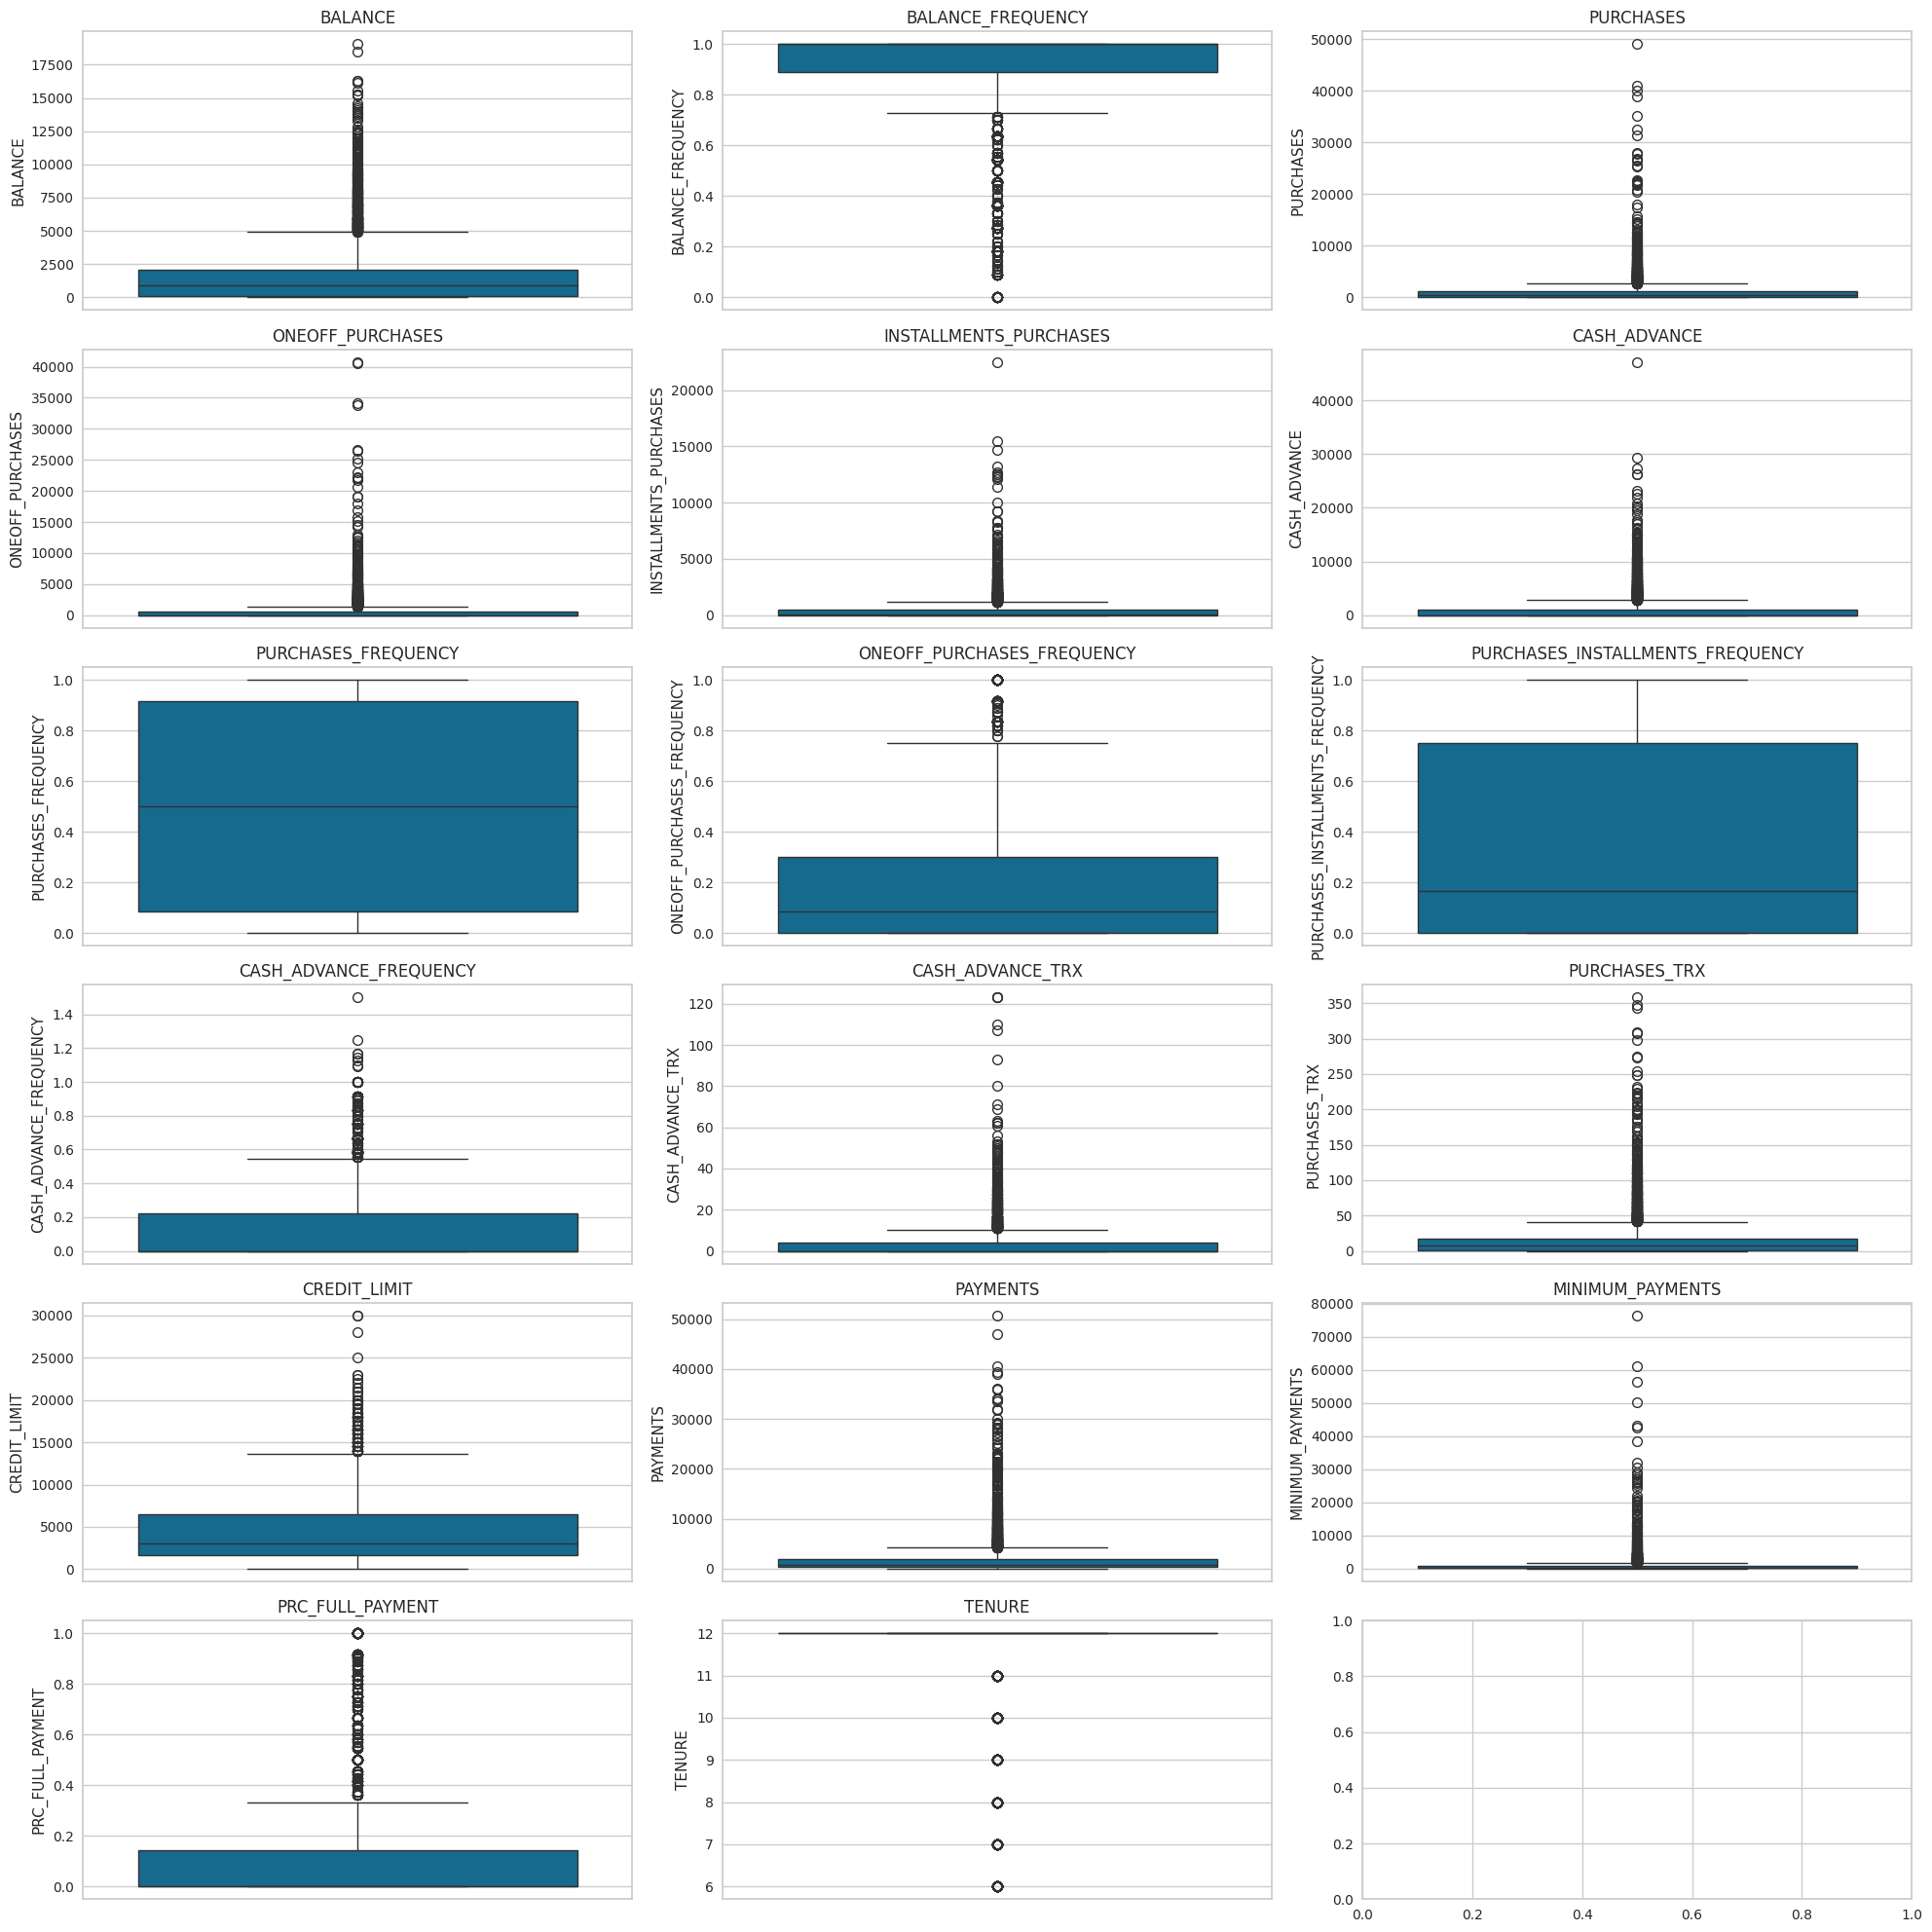

In [13]:
fig= plt.subplots(nrows=6 , ncols=3 , figsize=(20,20))
for i in range (len(df.columns)):
    plt.subplot(6,3,i+1)
    ax= sns.boxplot(df[df.columns[i]])
    plt.title(df.columns[i])
    plt.tight_layout()
plt.show()

In [14]:
# Calculate the IQR for each column in the dataset
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Identify outliers using the IQR method
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))

# Count the number of outliers for each variable
num_outliers = outliers.sum()

# Number of outliers for each variable
num_outliers.to_frame().T

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,695,1492,808,1013,867,1030,0,782,0,525,804,766,248,808,909,1474,1365


In [15]:
outlier_counts = {}

for col in df.columns:
    outliers = df[stats.zscore(df[col]) > 3][col]
    outlier_counts[col] = outliers.count()

outlier_df = pd.DataFrame.from_dict(outlier_counts, orient='index', columns=['Outlier Count'])
outlier_df.T

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
Outlier Count,196,0,135,122,137,182,0,0,0,199,172,185,152,159,102,0,0


In [16]:
print('z-score', outlier_df.sum())

z-score Outlier Count    1741
dtype: int64


In [17]:
Outliers_Treatment = df.copy()

In [19]:
# Calculate the IQR for each column in the dataset
Q1 = Outliers_Treatment.quantile(0.25)
Q3 = Outliers_Treatment.quantile(0.75)
IQR = Q3 - Q1

# Calculate upper and lower whisker values for each column
whisker_width = 1.5
lower_whisker = Q1 - (whisker_width * IQR)
upper_whisker = Q3 + (whisker_width * IQR)

# Replace outliers with upper or lower whisker values for each column
for col in Outliers_Treatment.columns:
    Outliers_Treatment[col] = np.where(Outliers_Treatment[col] > upper_whisker[col], upper_whisker[col], np.where(Outliers_Treatment[col] < lower_whisker[col], lower_whisker[col], Outliers_Treatment[col]))
    
# Recheck outliers using the IQR method
outliers = ((Outliers_Treatment < (Q1 - 1.5 * IQR)) | (Outliers_Treatment > (Q3 + 1.5 * IQR)))
num_outliers = outliers.sum()
num_outliers.to_frame().T

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [20]:
Outliers_Treatment.shape

(8949, 17)